In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Loading

In [2]:
df = pd.read_csv('/Users/tauny/Desktop/Schulich - School/Classes/Fall 2024 - Semester 2/Data Science II/Exams/Recipe Reviews and User Feedback Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,recipe_number,recipe_code,recipe_name,comment_id,user_id,user_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,0,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2G3aneMRgRMZwXqIHmSdXSG1hEM,u_9iFLIhMa8QaG,Jeri326,1,1665619889,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FsPC83HtzCsQAtOxlbL6RcaPbY,u_Lu6p25tmE77j,Mark467,50,1665277687,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,2,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2FPrSGyTv7PQkZq37j92r9mYGkP,u_s0LwgpZ8Jsqq,Barbara566,10,1664404557,0,3,0,5,710,I have a very complicated white chicken chili ...
3,3,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DzdSIgV9qNiuBaLoZ7JQaartoC,u_fqrybAdYjgjG,jeansch123,1,1661787808,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,4,1,14299,Creamy White Chili,sp_aUSaElGf_14299_c_2DtZJuRQYeTFwXBoZRfRhBPEXjI,u_XXWKwVhKZD69,camper77,10,1664913823,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18182 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18182 non-null  int64 
 1   recipe_number    18182 non-null  int64 
 2   recipe_code      18182 non-null  int64 
 3   recipe_name      18182 non-null  object
 4   comment_id       18182 non-null  object
 5   user_id          18182 non-null  object
 6   user_name        18182 non-null  object
 7   user_reputation  18182 non-null  int64 
 8   created_at       18182 non-null  int64 
 9   reply_count      18182 non-null  int64 
 10  thumbs_up        18182 non-null  int64 
 11  thumbs_down      18182 non-null  int64 
 12  stars            18182 non-null  int64 
 13  best_score       18182 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.1+ MB


# Cleaning

Dropping the two Nulls vals from the text variale because instead of trying to fill it with something that could be a misrrepresentation, dropping the two rows althoghether will have a smaller effect. There are many rows in the data set.

In [5]:
# Drop rows with Null values
df = df.dropna(subset=['text'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, 0 to 18181
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       18180 non-null  int64 
 1   recipe_number    18180 non-null  int64 
 2   recipe_code      18180 non-null  int64 
 3   recipe_name      18180 non-null  object
 4   comment_id       18180 non-null  object
 5   user_id          18180 non-null  object
 6   user_name        18180 non-null  object
 7   user_reputation  18180 non-null  int64 
 8   created_at       18180 non-null  int64 
 9   reply_count      18180 non-null  int64 
 10  thumbs_up        18180 non-null  int64 
 11  thumbs_down      18180 non-null  int64 
 12  stars            18180 non-null  int64 
 13  best_score       18180 non-null  int64 
 14  text             18180 non-null  object
dtypes: int64(10), object(5)
memory usage: 2.2+ MB


# EDA

In [7]:
# Drop columns that are unique user_id, user_name, user_id - these are unique values and will not contribute to any meanigful relationship

clean_df = df.drop(columns=['comment_id', 'user_name', 'user_id', 'Unnamed: 0', 'recipe_code'])

In [8]:
clean_df['created_at'] = pd.to_datetime(clean_df['created_at'], unit='s')  # 's' for seconds, 'ms' for milliseconds

In [9]:
# Check hte amount of unique options in each column.
clean_df.nunique()

recipe_number        100
recipe_name          100
user_reputation       22
created_at          2695
reply_count            4
thumbs_up             62
thumbs_down           58
stars                  6
best_score           588
text               17731
dtype: int64

In [10]:
clean_df.head()

,recipe_number,recipe_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text
0,1,Creamy White Chili,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ..."
1,1,Creamy White Chili,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...
2,1,Creamy White Chili,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...
3,1,Creamy White Chili,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee..."
4,1,Creamy White Chili,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...


stars
5    0.760561
0    0.093289
4    0.091034
3    0.026953
1    0.015402
2    0.012761
Name: proportion, dtype: float64


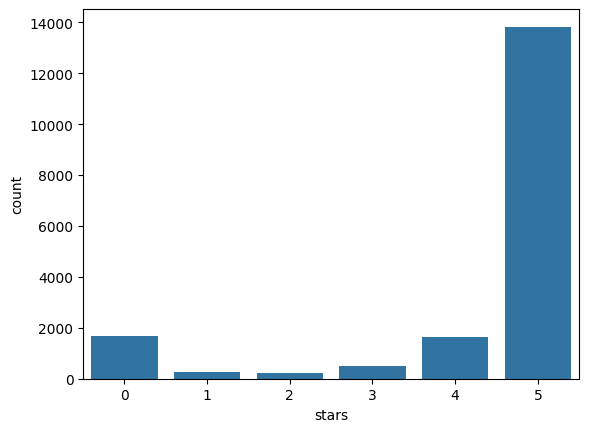

In [11]:
print(clean_df['stars'].value_counts(normalize=True))
sns.countplot(x='stars', data=clean_df)
plt.show()

In [12]:
# Check balance of possible target variables.
df['stars'].value_counts(normalize=True)

stars
5    0.760561
0    0.093289
4    0.091034
3    0.026953
1    0.015402
2    0.012761
Name: proportion, dtype: float64

# NLP & Sentiment analysis: Predict the sentiment of a review based on user feedback.

#### Basic Text Statistics

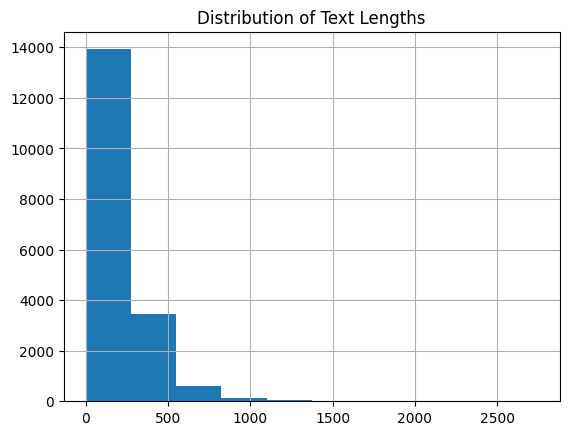

In [13]:
# Length of Text:
# Calculate the number of characters and words in each text entry.

clean_df['text_length'] = clean_df['text'].apply(len)
clean_df['word_count'] = clean_df['text'].apply(lambda x: len(str(x).split()))

# Plot distribution of text lengths
clean_df['text_length'].hist()
plt.title("Distribution of Text Lengths")
plt.show()

In [14]:
from collections import Counter

all_words = ' '.join(clean_df['text']).split()
print(f"Total unique words: {len(set(all_words))}")

Total unique words: 32579


In [15]:
# Top frequent words
word_counts = Counter(' '.join(clean_df['text']).split())
print(word_counts.most_common(10))

[('I', 29424), ('the', 26525), ('and', 23518), ('a', 16457), ('to', 13649), ('it', 13607), ('of', 11889), ('this', 10226), ('for', 9624), ('is', 7980)]


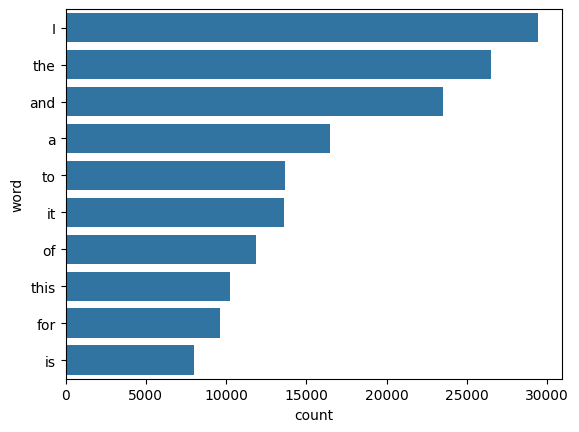

In [16]:
common_words = pd.DataFrame(word_counts.most_common(10), columns=['word', 'count'])
sns.barplot(x='count', y='word', data=common_words)
plt.show()

Text Cleaning

In [17]:
# Remove stop words
!pip install nltk


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tauny\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tauny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Example: Removing stop words from a single text
sample_text = 'text_cleaned'
words = word_tokenize('text_cleaned')  # Tokenize the text
filtered_words = [word for word in words if word.lower() not in stop_words]

print("Original:", sample_text)
print("Filtered:", " ".join(filtered_words))

Original: text_cleaned
Filtered: text_cleaned


In [20]:
# Apply stop word removal to the text column
clean_df['text_cleaned'] = clean_df['text'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words])
)

# Inspect cleaned text
print(clean_df[['text', 'text_cleaned']].head())

                                                text  \
0  I tweaked it a little, removed onions because ...   
1  Bush used to have a white chili bean and it ma...   
2  I have a very complicated white chicken chili ...   
3  In your introduction, you mentioned cream chee...   
4  Wonderful! I made this for a &#34;Chili/Stew&#...   

                                        text_cleaned  
0  tweaked little , removed onions onion haters h...  
1  Bush used white chili bean made recipe super s...  
2  complicated white chicken chili recipe made ye...  
3  introduction , mentioned cream cheese none lis...  
4  Wonderful ! made & # 34 ; Chili/Stew & # 34 ; ...  


In [21]:
# Text Cleaning Insights
# Inspect for the presence of:
# Stop words (e.g., "and", "the").
# Special characters (e.g., punctuation, emojis).
# Case inconsistencies (e.g., uppercase vs. lowercase).

import string

clean_df['contains_special_chars'] = clean_df['text_cleaned'].apply(lambda x: any(c in string.punctuation for c in x))
print(clean_df['contains_special_chars'].value_counts())

contains_special_chars
True     17724
False      456
Name: count, dtype: int64


In [22]:
# Above means (True) = this many characters hav special vals.
# Below removes the special characters.

In [23]:
import re

# Function to clean text
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function
clean_df['text_cleaned'] = clean_df['text_cleaned'].apply(clean_text)

# Verify the result
print(clean_df[['text_cleaned']].head())

                                        text_cleaned
0  tweaked little removed onions onion haters hou...
1  bush used white chili bean made recipe super s...
2  complicated white chicken chili recipe made ye...
3  introduction mentioned cream cheese none liste...
4  wonderful made chilistew night dinner church e...


In [24]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [25]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tauny\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tauny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:
# Stemming and Lemming made output words less meanginful  -- i took it out

In [28]:
!pip install textblob


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
# Sentiment Analysis
from textblob import TextBlob

clean_df['sentiment'] = clean_df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
clean_df['sentiment_category'] = clean_df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

print(clean_df['sentiment_category'].value_counts())

sentiment_category
Positive    15940
Negative     1137
Neutral      1103
Name: count, dtype: int64


In [30]:
# N-gram Analysis
# Tri-grams:
# Analyze sequences of 3 words that frequently occur together.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(3, 3)) 
ngram_matrix = vectorizer.fit_transform(clean_df['text_cleaned'])
ngram_counts = pd.DataFrame(ngram_matrix.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
ngram_counts.columns = ['count']
print(ngram_counts.nlargest(10, 'count'))

                         count
followed recipe exactly    158
made several times         131
next time make             116
first time made             94
made last night             94
made many times             94
best banana bread           92
whole family loved          88
cream cheese frosting       82
banana bread recipe         78


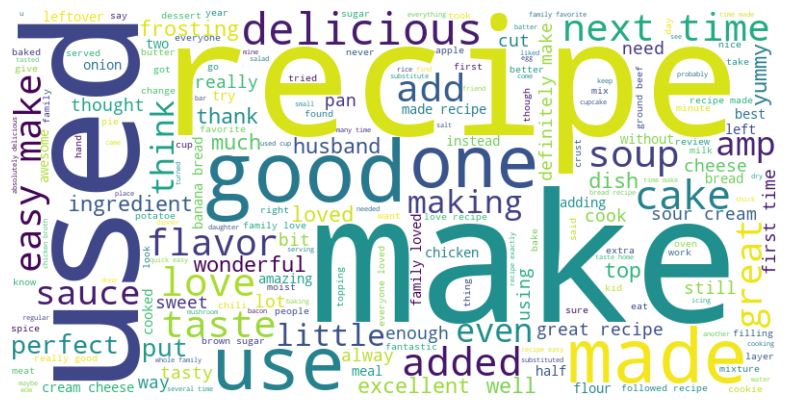

In [31]:
#Generate a word cloud to visualize the most frequent words.

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(clean_df['text_cleaned']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

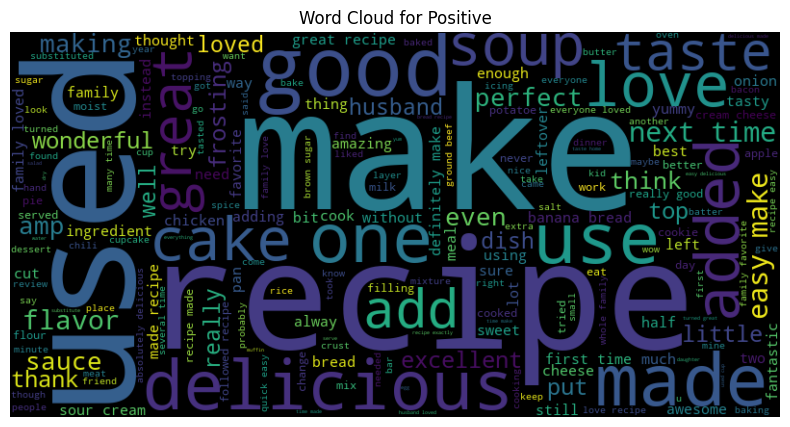

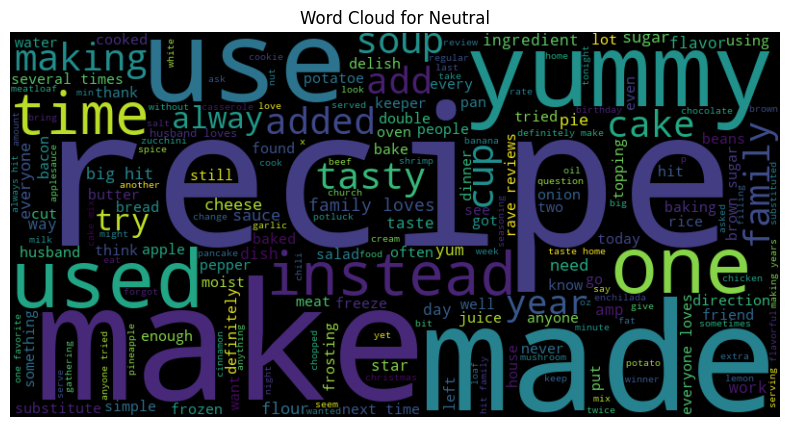

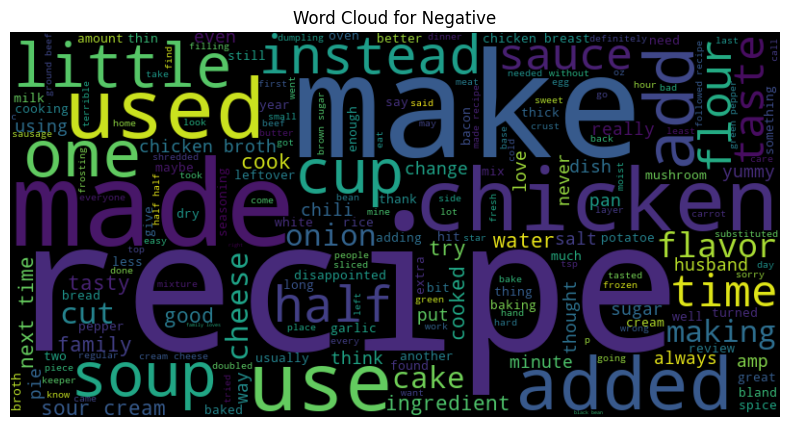

In [32]:
# Class-Based Word Analysis:
# Compare word frequencies for different categories in your star variable.

for category in clean_df['sentiment_category'].unique():
    category_words = ' '.join(clean_df[clean_df['sentiment_category'] == category]['text_cleaned'])
    wordcloud = WordCloud(width=800, height=400).generate(category_words)
    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for {category}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [33]:
# Relationships Between Text and Target
# Group by the target variable to explore how text features relate to it:
# Average word count by category:

print(clean_df.groupby('sentiment_category')['word_count'].mean())

#Frequent words per category:

for category in clean_df['sentiment_category'].unique():
    print(f"Top words for {category}:")
    print(Counter(' '.join(clean_df[clean_df['sentiment_category'] == category]['text_cleaned']).split()).most_common(10))


sentiment_category
Negative    43.963940
Neutral     16.307344
Positive    38.864304
Name: word_count, dtype: float64
Top words for Positive:
[('recipe', 8928), ('made', 5548), ('make', 5404), ('used', 3888), ('good', 3544), ('delicious', 3103), ('great', 2956), ('time', 2883), ('easy', 2785), ('added', 2518)]
Top words for Neutral:
[('recipe', 270), ('made', 203), ('make', 189), ('use', 105), ('family', 92), ('one', 88), ('yummy', 82), ('like', 82), ('used', 81), ('loves', 77)]
Top words for Negative:
[('recipe', 613), ('chicken', 504), ('make', 331), ('made', 328), ('used', 281), ('use', 256), ('added', 236), ('little', 219), ('like', 215), ('add', 202)]


In [34]:
clean_df.head()

,recipe_number,recipe_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,text_length,word_count,text_cleaned,contains_special_chars,sentiment,sentiment_category
0,1,Creamy White Chili,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ...",355,67,tweaked little removed onions onion haters hou...,True,0.229762,Positive
1,1,Creamy White Chili,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...,138,27,bush used white chili bean made recipe super s...,True,0.083333,Positive
2,1,Creamy White Chili,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...,354,63,complicated white chicken chili recipe made ye...,True,0.159091,Positive
3,1,Creamy White Chili,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee...",93,15,introduction mentioned cream cheese none liste...,True,0.000000,Neutral
4,1,Creamy White Chili,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,238,42,wonderful made chilistew night dinner church e...,True,0.233333,Positive


In [35]:
# Stem the words, remove different endings from same words

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
clean_df['text_cleaned'] = clean_df['text_cleaned'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [36]:
# Lemming the words, take close words back to their root words.

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')  # Download if not already done

lemmatizer = WordNetLemmatizer()
clean_df['text_cleaned'] = clean_df['text_cleaned'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tauny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample data
documents = clean_df['text_cleaned'].tolist()  # Ensure you have preprocessed text data

# Create Bag-of-Words model
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(documents)

# Convert to DataFrame for better understanding
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())
print("Bag-of-Words Model:\n", bow_df)

# Create an N-Gram model (bigram)
vectorizer_ngram = CountVectorizer(ngram_range=(2, 2))  # Using bigrams
X_ngram = vectorizer_ngram.fit_transform(documents)



Bag-of-Words Model:
        aa  aaah  aback  abd  aberr  abflrjaiihqfjlyhopclickbanknet  abigail  \
0       0     0      0    0      0                               0        0   
1       0     0      0    0      0                               0        0   
2       0     0      0    0      0                               0        0   
3       0     0      0    0      0                               0        0   
4       0     0      0    0      0                               0        0   
...    ..   ...    ...  ...    ...                             ...      ...   
18175   0     0      0    0      0                               0        0   
18176   0     0      0    0      0                               0        0   
18177   0     0      0    0      0                               0        0   
18178   0     0      0    0      0                               0        0   
18179   0     0      0    0      0                               0        0   

       abil  abl  abot  ...  z

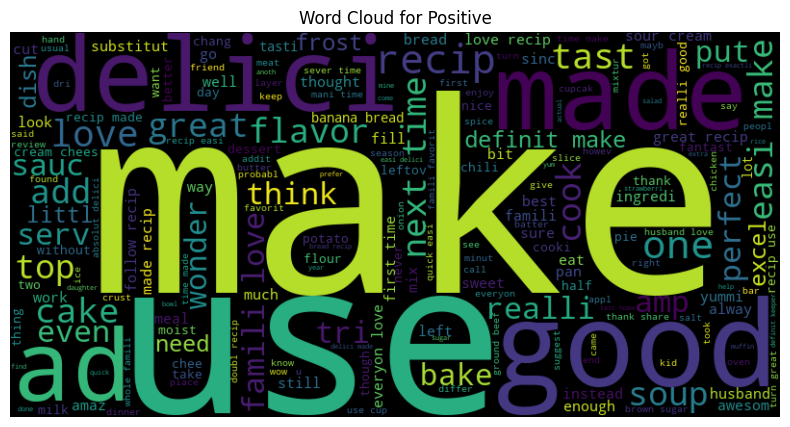

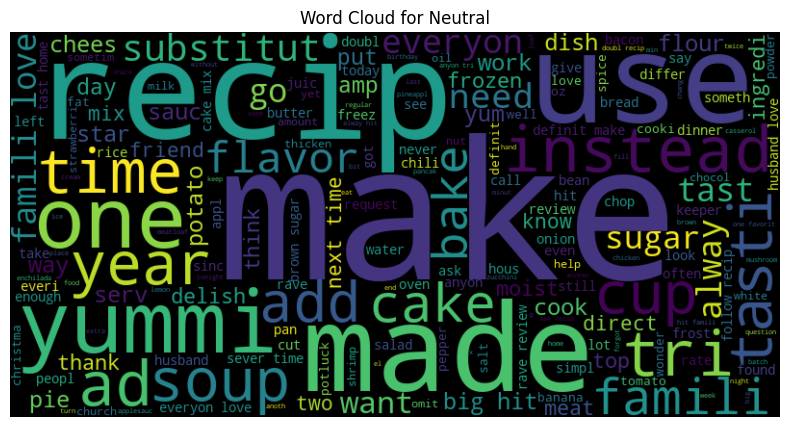

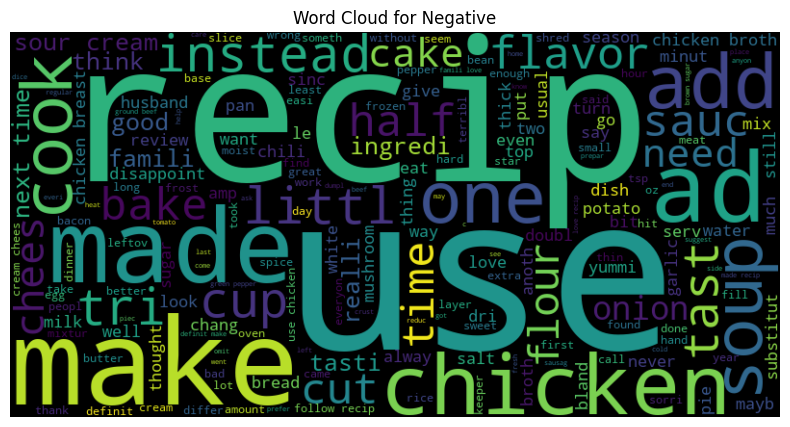

In [38]:
for category in clean_df['sentiment_category'].unique():
    category_words = ' '.join(clean_df[clean_df['sentiment_category'] == category]['text_cleaned'])
    wordcloud = WordCloud(width=800, height=400).generate(category_words)
    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for {category}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [39]:
import re
from collections import Counter
import nltk
from nltk.corpus import words

# Ensure you have the word list downloaded from NLTK
nltk.download('words')

# Define an English vocabulary
english_vocab = set(words.words())

# Calculate word frequencies in the cleaned text
word_counts = Counter(' '.join(clean_df['text_cleaned']).split())

# Define a minimum frequency threshold for filtering
min_freq = 5  # Adjust this threshold as needed

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tauny\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [40]:
# Check Against a Dictionary:
# You can compare each word against a list of common English words.

# Combine Both Methods:
# Integrate dictionary-based filtering and frequency-based filtering for a robust approach:
# Filter Based on Frequency:
# Remove extremely rare words that might appear only once or twice in the dataset.

def filter_combined(word):
    return not (re.match(r'^[a-zA-Z]{2,20}$', word) and word.lower() in english_vocab and word_counts[word] >= min_freq)

clean_df['text_cleaned'] = clean_df['text_cleaned'].apply(
    lambda x: ' '.join([word for word in x.split() if not filter_combined(word)])
)

In [41]:
# Verify the result
print(clean_df[['text_cleaned']].head(20))

                                         text_cleaned
0   tweak onion onion hater use season instead use...
1   use white chili bean made super written ask pl...
2   white chicken chili made year rave saw thought...
3                             mention cream none list
4   wonder made night dinner church want make quit...
5                              love much go make week
6   wow excel written chang made use jar great nor...
7   make often one time daughter husband two son v...
8   love tweak quit bit want chili green chili can...
9                  make lot friend come ask make time
10                           best easiest white chili
11  best white chili sharp sour cream chop green o...
12  excel ad cream perfect comfort food usual make...
13  made chili winter gather chili show expect mea...
14  fantast mild ad half said white chili simmer s...
15                                                   
16                     like mild would recommend make
17                          

In [42]:
# Sample data
documents = clean_df['text_cleaned'].tolist()  # Ensure you have preprocessed text data

In [43]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF model
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(documents)

# Convert to DataFrame for better understanding
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
print("TF-IDF Model:\n", tfidf_df)

TF-IDF Model:
        absorb  accept  access  accident  accord  account  acid  across  act  \
0         0.0     0.0     0.0       0.0     0.0      0.0   0.0     0.0  0.0   
1         0.0     0.0     0.0       0.0     0.0      0.0   0.0     0.0  0.0   
2         0.0     0.0     0.0       0.0     0.0      0.0   0.0     0.0  0.0   
3         0.0     0.0     0.0       0.0     0.0      0.0   0.0     0.0  0.0   
4         0.0     0.0     0.0       0.0     0.0      0.0   0.0     0.0  0.0   
...       ...     ...     ...       ...     ...      ...   ...     ...  ...   
18175     0.0     0.0     0.0       0.0     0.0      0.0   0.0     0.0  0.0   
18176     0.0     0.0     0.0       0.0     0.0      0.0   0.0     0.0  0.0   
18177     0.0     0.0     0.0       0.0     0.0      0.0   0.0     0.0  0.0   
18178     0.0     0.0     0.0       0.0     0.0      0.0   0.0     0.0  0.0   
18179     0.0     0.0     0.0       0.0     0.0      0.0   0.0     0.0  0.0   

       actual  ...   yo  young  youn

In [44]:
!pip install spacy
!python -m spacy download en_core_web_md


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/33.5 MB ? eta -:--:--
     ---------------------------------------- 0.3/33.5 MB ? eta -:--:--
     - -------------------------------------- 1.0/33.5 MB 2.5 MB/s eta 0:00:13
     -- ------------------------------------- 1.8/33.5 MB 3.1 MB/s eta 0:00:11
     --- ------------------------------------ 2.6/33.5 MB 3.4 MB/s eta 0:00:10
     ---- ----------------------------------- 3.4/33.5 MB 3.5 MB/s eta 0:00:09
     ----- ---------------------------------- 4.2/33.5 MB 3.6 MB/s eta 0:00:09
     ------ --------------------------------- 5.5/33.5 MB 3.9 MB/s eta 0:00:08
     ------- -------------------------------- 6.6/33.5 MB 4.1 MB/s eta 0:00:07
     --------- ------------------------------ 7.9/33.5 MB 4.4 MB/s eta 0:00:06
     ----------- ---------------------------- 9.4/33.5 MB 4.7 MB/s eta 0:00:06
     ------------- -------------------------- 11.0/33.5 MB 5.0 MB/s eta 0:00:05
     --------------- ------------------------ 12.6/33.5 MB 5.2 MB


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import spacy

# Load Spacy Model
nlp = spacy.load("en_core_web_md")

# Define reference sentences for each sentiment category
sentiment_references = {
    "positive": "This review is highly positive and enthusiastic.",
    "neutral": "This review is neutral and does not show strong emotion.",
    "negative": "This review is highly critical and negative."
}

# Compute similarity for the review with each sentiment category
sample_text = clean_df['text_cleaned'].iloc[0]
for label, reference_text in sentiment_references.items():
    similarity = nlp(sample_text).similarity(nlp(reference_text))
    print(f"Similarity between the review and '{label}': {similarity}")



Similarity between the review and 'positive': 0.650954008102417
Similarity between the review and 'neutral': 0.7075907588005066
Similarity between the review and 'negative': 0.6257443428039551


In [46]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Prepare the data
documents = clean_df['text_cleaned'].tolist()  # Ensure you have preprocessed text data
labels = clean_df['sentiment_category'].tolist()           # Labels for classification

# Create a TF-IDF model
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(documents)  # Transform the text into TF-IDF features

# Convert to a dense array (if needed) and ensure it matches the format expected by ML models
X = X_tfidf.toarray()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Train a simple Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Sentiment Classifier Accuracy: {accuracy:.2%}")

Sentiment Classifier Accuracy: 89.30%


# DEEP LEARNING

In [47]:
pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

Since data has been cleaned for sentiment analysis, we can continue with the clean_df and text.

Just looking at the processed etails here to see if it is ready for deep learning.

In [49]:
# Checking my dataframe
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18180 entries, 0 to 18181
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   recipe_number           18180 non-null  int64         
 1   recipe_name             18180 non-null  object        
 2   user_reputation         18180 non-null  int64         
 3   created_at              18180 non-null  datetime64[ns]
 4   reply_count             18180 non-null  int64         
 5   thumbs_up               18180 non-null  int64         
 6   thumbs_down             18180 non-null  int64         
 7   stars                   18180 non-null  int64         
 8   best_score              18180 non-null  int64         
 9   text                    18180 non-null  object        
 10  text_length             18180 non-null  int64         
 11  word_count              18180 non-null  int64         
 12  text_cleaned            18180 non-null  object     

In [50]:
# For text fields, inspect the first few entries to understand their content:

clean_df['text_cleaned'].head(10)

0    tweak onion onion hater use season instead use...
1    use white chili bean made super written ask pl...
2    white chicken chili made year rave saw thought...
3                              mention cream none list
4    wonder made night dinner church want make quit...
5                               love much go make week
6    wow excel written chang made use jar great nor...
7    make often one time daughter husband two son v...
8    love tweak quit bit want chili green chili can...
9                   make lot friend come ask make time
Name: text_cleaned, dtype: object

In [51]:
# Check date span in data
clean_df['created_at'].min(), clean_df['created_at'].max()

(Timestamp('2021-02-11 09:22:16'), Timestamp('2022-10-14 14:00:35'))

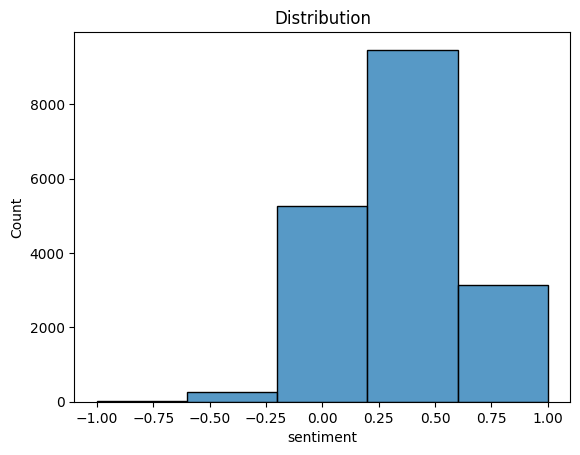

In [52]:
# Visualize key feautres 

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(clean_df['sentiment'], bins=5, kde=False)
plt.title('Distribution')
plt.show()

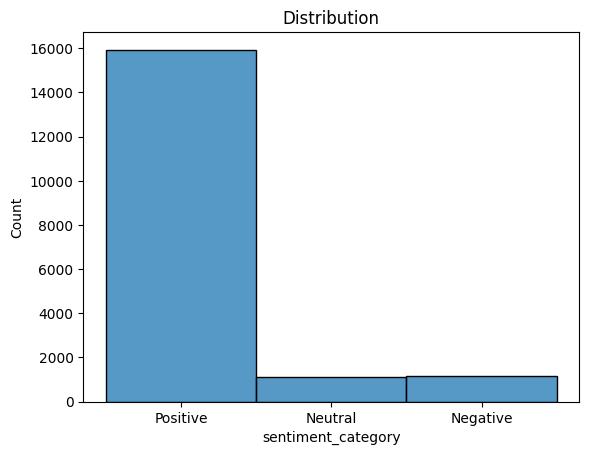

In [53]:
# Visualize key feautres 

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(clean_df['sentiment_category'], bins=5, kde=False)
plt.title('Distribution')
plt.show()

In [54]:
# Display the first 10 rows of the text_cleaned column
print(clean_df['text_cleaned'].head(10))

0    tweak onion onion hater use season instead use...
1    use white chili bean made super written ask pl...
2    white chicken chili made year rave saw thought...
3                              mention cream none list
4    wonder made night dinner church want make quit...
5                               love much go make week
6    wow excel written chang made use jar great nor...
7    make often one time daughter husband two son v...
8    love tweak quit bit want chili green chili can...
9                   make lot friend come ask make time
Name: text_cleaned, dtype: object


In [55]:
clean_df['recipe_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [56]:
clean_df['recipe_name'].unique()

array(['Creamy White Chili', 'Best Ever Banana Bread',
       'Cheeseburger Soup', 'Amish Breakfast Casserole',
       'Pumpkin Spice Cupcakes with Cream Cheese Frosting',
       'Favorite Chicken Potpie', 'Flavorful Chicken Fajitas',
       'Apple Pie', 'Enchilada Casser-Ole!', 'Zucchini Pizza Casserole',
       'Traditional Lasagna', 'Cauliflower Soup', 'Basic Homemade Bread',
       'Zucchini Cupcake', 'Li’l Cheddar Meat Loaves',
       'Rustic Italian Tortellini Soup', 'Fluffy Key Lime Pie',
       'Stuffed Pepper Soup', 'Moist Chocolate Cake', 'Mom’s Meat Loaf',
       'Pineapple Orange Cake', 'Baked Spaghetti', 'Buttery Cornbread',
       'Sandy’s Chocolate Cake', 'Baked Mushroom Chicken',
       'Hot Milk Cake', 'Macaroni Coleslaw', 'Cheesy Ham Chowder',
       'Winning Apple Crisp', 'Forgotten Jambalaya',
       'Basic Banana Muffins', 'Seafood Lasagna', 'Creamy Grape Salad',
       'Peanut Butter Chocolate Dessert', 'Flavorful Pot Roast',
       'Pumpkin Bread', 'Taco Lasagna'

In [57]:
clean_df['recipe_name'].unique()

array(['Creamy White Chili', 'Best Ever Banana Bread',
       'Cheeseburger Soup', 'Amish Breakfast Casserole',
       'Pumpkin Spice Cupcakes with Cream Cheese Frosting',
       'Favorite Chicken Potpie', 'Flavorful Chicken Fajitas',
       'Apple Pie', 'Enchilada Casser-Ole!', 'Zucchini Pizza Casserole',
       'Traditional Lasagna', 'Cauliflower Soup', 'Basic Homemade Bread',
       'Zucchini Cupcake', 'Li’l Cheddar Meat Loaves',
       'Rustic Italian Tortellini Soup', 'Fluffy Key Lime Pie',
       'Stuffed Pepper Soup', 'Moist Chocolate Cake', 'Mom’s Meat Loaf',
       'Pineapple Orange Cake', 'Baked Spaghetti', 'Buttery Cornbread',
       'Sandy’s Chocolate Cake', 'Baked Mushroom Chicken',
       'Hot Milk Cake', 'Macaroni Coleslaw', 'Cheesy Ham Chowder',
       'Winning Apple Crisp', 'Forgotten Jambalaya',
       'Basic Banana Muffins', 'Seafood Lasagna', 'Creamy Grape Salad',
       'Peanut Butter Chocolate Dessert', 'Flavorful Pot Roast',
       'Pumpkin Bread', 'Taco Lasagna'

Predict Recipe Name

In [58]:
clean_df.head()

,recipe_number,recipe_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text,text_length,word_count,text_cleaned,contains_special_chars,sentiment,sentiment_category
0,1,Creamy White Chili,1,2022-10-13 00:11:29,0,0,0,5,527,"I tweaked it a little, removed onions because ...",355,67,tweak onion onion hater use season instead use...,True,0.229762,Positive
1,1,Creamy White Chili,50,2022-10-09 01:08:07,0,7,0,5,724,Bush used to have a white chili bean and it ma...,138,27,use white chili bean made super written ask pl...,True,0.083333,Positive
2,1,Creamy White Chili,10,2022-09-28 22:35:57,0,3,0,5,710,I have a very complicated white chicken chili ...,354,63,white chicken chili made year rave saw thought...,True,0.159091,Positive
3,1,Creamy White Chili,1,2022-08-29 15:43:28,2,2,0,0,581,"In your introduction, you mentioned cream chee...",93,15,mention cream none list,True,0.000000,Neutral
4,1,Creamy White Chili,10,2022-10-04 20:03:43,1,7,0,0,820,Wonderful! I made this for a &#34;Chili/Stew&#...,238,42,wonder made night dinner church want make quit...,True,0.233333,Positive


In [59]:
print(clean_df.columns.tolist())

['recipe_number', 'recipe_name', 'user_reputation', 'created_at', 'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score', 'text', 'text_length', 'word_count', 'text_cleaned', 'contains_special_chars', 'sentiment', 'sentiment_category']


In [60]:
# Drop undeeded columns
deep_df = clean_df.drop(columns=['recipe_number', 'text', 'contains_special_chars'])

In [61]:
deep_df = deep_df.dropna().reset_index(drop=True)

In [62]:
# Scale Data 

from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['user_reputation', 'reply_count', 'thumbs_up', 'thumbs_down', 'stars', 'best_score', 'text_length', 'word_count', 'sentiment']
deep_df[numerical_features] = scaler.fit_transform(deep_df[numerical_features])


In [63]:
# One-hot encode the sentiment_category column
one_hot_encoded = pd.get_dummies(deep_df['sentiment_category'], prefix='sentiment').astype(int)

# Add the one-hot encoded columns to the original DataFrame
deep_df = pd.concat([deep_df, one_hot_encoded], axis=1)

In [64]:
deep_df.head()

,recipe_name,user_reputation,created_at,reply_count,thumbs_up,thumbs_down,stars,best_score,text_length,word_count,text_cleaned,sentiment,sentiment_category,sentiment_Negative,sentiment_Neutral,sentiment_Positive
0,Creamy White Chili,-0.115801,2022-10-13 00:11:29,-0.106042,-0.259309,-0.158317,0.460429,2.649823,0.876135,0.909427,tweak onion onion hater use season instead use...,-0.432934,Positive,0,0,1
1,Creamy White Chili,4.776892,2022-10-09 01:08:07,-0.106042,1.406920,-0.158317,0.460429,4.046213,-0.382194,-0.336990,use white chili bean made super written ask pl...,-0.954549,Positive,0,0,1
2,Creamy White Chili,0.782857,2022-09-28 22:35:57,-0.106042,0.454789,-0.158317,0.460429,3.946977,0.870337,0.784785,white chicken chili made year rave saw thought...,-0.684682,Positive,0,0,1
3,Creamy White Chili,-0.115801,2022-08-29 15:43:28,14.389054,0.216756,-0.158317,-2.776213,3.032590,-0.643138,-0.710915,mention cream none list,-1.251404,Neutral,0,1,0
4,Creamy White Chili,0.782857,2022-10-04 20:03:43,7.141506,1.406920,-0.158317,-2.776213,4.726687,0.197681,0.130416,wonder made night dinner church want make quit...,-0.420212,Positive,0,0,1


In [65]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text_cleaned column
tokenizer = Tokenizer()
tokenizer.fit_on_texts(deep_df['text_cleaned'])
sequences = tokenizer.texts_to_sequences(deep_df['text_cleaned'])

# Pad the sequences
max_len = 100  # Adjust max length as needed
padded_sequences = pad_sequences(sequences, maxlen=max_len)


In [66]:
# Convert to Unix timestamp
deep_df['created_at'] = deep_df['created_at'].astype(int) // 10**9

In [67]:
# Drop 'sentiment_category', 'recipe_name', and 'text_cleaned' columns
X = deep_df.drop(['sentiment_category', 'recipe_name', 'text_cleaned', 'created_at'], axis=1)

# Ensure 'padded' column is added correctly
padded_sequences = np.array(padded_sequences)  # Ensure padded sequences are a consistent NumPy array
X['padded'] = list(padded_sequences)

# Expand the padded sequences into individual columns
padded_df = pd.DataFrame(padded_sequences, columns=[f'padded_{i}' for i in range(padded_sequences.shape[1])])

# Combine the original DataFrame (excluding 'padded') with the expanded padded sequences
X = pd.concat([X.drop(columns=['padded']), padded_df], axis=1)

# Convert the entire DataFrame to a NumPy array
X = X.values


In [68]:
# Set y to the target variable (e.g., sentiment, recipe category)
# One-hot encode the recipe_name column

y = pd.get_dummies(deep_df['recipe_name']).astype(int)

In [69]:
print("y Type:", type(y), "Shape:", np.shape(y), "Unique values:", np.unique(y))

y Type: <class 'pandas.core.frame.DataFrame'> Shape: (18180, 100) Unique values: [0 1]


In [70]:
print(X[:5])
print(y[:5])

[[-1.15800658e-01 -1.06042232e-01 -2.59308993e-01 -1.58317279e-01
   4.60429273e-01  2.64982324e+00  8.76135383e-01  9.09426909e-01
  -4.32933894e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000

In [71]:
unique_counts = deep_df.nunique()
print(unique_counts)

recipe_name             100
user_reputation          22
created_at             2695
reply_count               4
thumbs_up                62
thumbs_down              58
stars                     6
best_score              588
text_length             928
word_count              241
text_cleaned          16704
sentiment              3889
sentiment_category        3
sentiment_Negative        2
sentiment_Neutral         2
sentiment_Positive        2
dtype: int64


In [72]:
print(X.shape)  # Check the shape of X
print(type(X))  # Confirm it's a NumPy array
print(X[0])  # Inspect the first row to identify nested sequences

(18180, 112)
<class 'numpy.ndarray'>
[-1.15800658e-01 -1.06042232e-01 -2.59308993e-01 -1.58317279e-01
  4.60429273e-01  2.64982324e+00  8.76135383e-01  9.09426909e-01
 -4.32933894e-01  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0

In [73]:
# Convert rows to numeric values or arrays
X = np.array([np.array(row).flatten() if isinstance(row, (list, np.ndarray)) else np.array([row]) for row in X], dtype=float)

In [74]:
for i, row in enumerate(X):
    try:
        _ = np.array(row, dtype=float)
    except Exception as e:
        print(f"Row {i} is problematic: {row}, Error: {e}")

In [75]:
y = y.to_numpy()  # Convert DataFrame/Series to NumPy array

In [76]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (18180, 112)
Shape of y: (18180, 100)


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (14544, 112)
y_train: (14544, 100)
X_test: (3636, 112)
y_test: (3636, 100)


In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Flatten
from tensorflow.keras import layers

In [80]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(112,), kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(100, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())
    ])

In [81]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_zeros = simple_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
print("X_train sample:", X_train[0])  # View the first row of X_train
print("y_train sample:", y_train[0])  # View the first row of y_train

X_train sample: [-1.15800658e-01 -1.06042232e-01 -2.59308993e-01 -1.58317279e-01
  4.60429273e-01 -3.76869188e-01 -6.89527824e-01 -7.10915433e-01
  1.59839743e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

In [83]:
print(X_test.dtype)  # Prints the data type of the entire array

float64


In [84]:
print(X_test)
print(X_test.shape)

[[ 2.77987488e+00 -1.06042232e-01  1.64495256e+00 ...  9.00000000e+00
   5.96000000e+02  5.15000000e+02]
 [-1.15800658e-01 -1.06042232e-01 -2.59308993e-01 ...  2.20000000e+01
   2.90000000e+01  4.35000000e+02]
 [-1.15800658e-01 -1.06042232e-01  4.54789088e-01 ...  2.46000000e+02
   4.60000000e+01  7.10000000e+01]
 ...
 [-1.15800658e-01 -1.06042232e-01 -2.59308993e-01 ...  4.60000000e+01
   8.25000000e+02  6.10000000e+01]
 [-1.15800658e-01 -1.06042232e-01  1.16888717e+00 ...  1.86000000e+02
   2.51000000e+02  1.19000000e+02]
 [ 1.78136608e+00 -1.06042232e-01 -2.59308993e-01 ...  5.00000000e+01
   1.57000000e+02  4.29000000e+02]]
(3636, 112)


In [85]:
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.0312 - loss: 4.6048 - val_accuracy: 0.0385 - val_loss: 4.6035
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0401 - loss: 4.6031 - val_accuracy: 0.0385 - val_loss: 4.6019
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0402 - loss: 4.6014 - val_accuracy: 0.0385 - val_loss: 4.6003
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0392 - loss: 4.5997 - val_accuracy: 0.0385 - val_loss: 4.5987
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0403 - loss: 4.5980 - val_accuracy: 0.0385 - val_loss: 4.5972
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0399 - loss: 4.5964 - val_accuracy: 0.0385 - val_loss: 4.5956
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0416 - loss: 4.5946 - val_accuracy: 0.0385 - val_loss: 4.5941
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0406 - loss: 4.5929 - val_accuracy: 0.0385 - val_loss: 4.5926

LSTM - Long Sort Term Memmory Model

In [86]:
print("Minimum value in X_train:", X_train.min())
print("Maximum value in X_train:", X_train.max())

Minimum value in X_train: -4.8136546725132225
Maximum value in X_train: 1641.0


In [ ]:
# This model takes a long time to run!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=113),  # Adjust input_dim as needed based on vocabulary size
    LSTM(128, return_sequences=True),  # First LSTM layer with output sequences
    Dropout(0.3),                      # Regularization to prevent overfitting
    LSTM(64),                          # Second LSTM layer
    Dropout(0.3),
    Dense(100, activation='softmax')   # Match the number of classes in your y_train
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 63s 251ms/step - accuracy: 0.0345 - loss: 4.5251 - val_accuracy: 0.0858 - val_loss: 4.1189
Epoch 2/10
 99/228 ━━━━━━━━━━━━━━━━━━━━ 34s 267ms/step - accuracy: 0.0905 - loss: 4.0381

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.3355 - loss: 2.9685
Test Accuracy: 33.88%


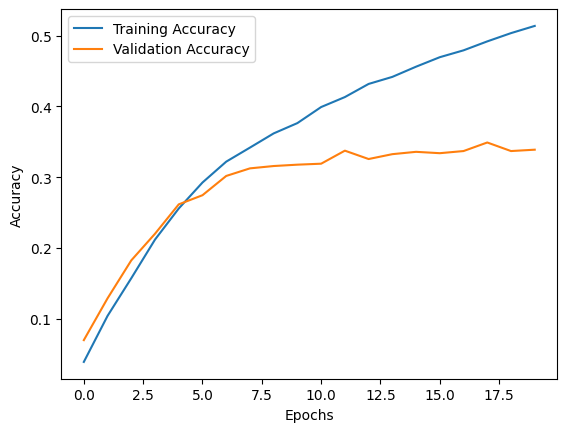

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Gap betweentwo lines starts increaseafter around 5-7 epoches. Redoing model with changes.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Define the LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=113),  # Adjust input_dim as needed based on vocabulary size
    Bidirectional(LSTM(128, return_sequences=True)),  # First LSTM layer with output sequences
    Dropout(0.3),
    Bidirectional(LSTM(64)),                      # Regularization to prevent overfitting
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),                          # Second LSTM layer
    Dropout(0.2),
    Dense(100, activation='softmax')   # Match the number of classes in your y_train
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

Epoch 1/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 149s 300ms/step - accuracy: 0.0405 - loss: 4.8021 - val_accuracy: 0.0905 - val_loss: 4.0988 - learning_rate: 0.0010
Epoch 2/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 126s 278ms/step - accuracy: 0.0940 - loss: 3.9985 - val_accuracy: 0.1298 - val_loss: 3.7481 - learning_rate: 0.0010
Epoch 3/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 138s 304ms/step - accuracy: 0.1250 - loss: 3.7056 - val_accuracy: 0.1438 - val_loss: 3.6085 - learning_rate: 0.0010
Epoch 4/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 156s 343ms/step - accuracy: 0.1527 - loss: 3.5151 - val_accuracy: 0.1584 - val_loss: 3.5373 - learning_rate: 0.0010
Epoch 5/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 131s 288ms/step - accuracy: 0.1702 - loss: 3.4005 - val_accuracy: 0.1744 - val_loss: 3.4640 - learning_rate: 0.0010
Epoch 6/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 150s 331ms/step - accuracy: 0.1952 - loss: 3.2790 - val_accuracy: 0.1917 - val_loss: 3.4067 - learning_rate: 0.0010
Epoch 7/7
455/455 ━━━━━━━━━━━━━━━━━━━━ 167s 366ms/step - accuracy: 0.2

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.2028 - loss: 3.3623
Test Accuracy: 20.82%


CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Embedding

In [ ]:
# Define the CNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=113),  # Embedding for input data
    Conv1D(filters=64, kernel_size=3, activation='relu'),        # Convolutional layer
    MaxPooling1D(pool_size=2),                                   # Max pooling layer
    Conv1D(filters=32, kernel_size=3, activation='relu'),        # Additional convolutional layer
    MaxPooling1D(pool_size=2),                                   # Max pooling
    Flatten(),                                                   # Flatten to feed into Dense layers
    Dense(128, activation='relu'),                               # Fully connected layer
    Dropout(0.3),                                                # Regularization
    Dense(100, activation='softmax')                             # Output layer (100 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


228/228 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.0346 - loss: 4.5226 - val_accuracy: 0.0539 - val_loss: 4.3162
Epoch 2/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.0663 - loss: 4.2188 - val_accuracy: 0.1196 - val_loss: 3.8925
Epoch 3/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.1206 - loss: 3.8215 - val_accuracy: 0.1474 - val_loss: 3.6595
Epoch 4/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.1537 - loss: 3.5354 - val_accuracy: 0.1672 - val_loss: 3.5063
Epoch 5/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.1863 - loss: 3.3028 - val_accuracy: 0.1818 - val_loss: 3.4425
Epoch 6/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.2267 - loss: 3.1156 - val_accuracy: 0.1969 - val_loss: 3.3864
Epoch 7/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.2593 - loss: 2.9548 - val_accuracy: 0.2140 - val_loss: 3.3638
Epoch 8/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.2937 - loss: 2.7749 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2314 - loss: 5.2774
Test Accuracy: 23.68%


RNN network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding, Dropout

In [ ]:
# Define the RNN model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=113),  # Embedding for text data
    SimpleRNN(128, return_sequences=True, activation='relu'),    # First RNN layer
    Dropout(0.3),                                                # Regularization
    SimpleRNN(64, activation='relu'),                           # Second RNN layer
    Dropout(0.3),
    Dense(128, activation='relu'),                               # Fully connected layer
    Dropout(0.2),
    Dense(100, activation='softmax')                             # Output layer for 100 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 30s 109ms/step - accuracy: 0.0294 - loss: 4.5334 - val_accuracy: 0.0404 - val_loss: 4.3941
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 30s 131ms/step - accuracy: 0.0445 - loss: 4.3199 - val_accuracy: 0.0506 - val_loss: 4.1115
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 31s 136ms/step - accuracy: 0.0532 - loss: 4.0725 - val_accuracy: 0.0630 - val_loss: 3.9633
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.0771 - loss: 3.9336 - val_accuracy: 0.0795 - val_loss: 3.9005
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.0807 - loss: 3.8330 - val_accuracy: 0.1147 - val_loss: 3.7396
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 25s 108ms/step - accuracy: 0.1186 - loss: 3.6349 - val_accuracy: 0.1199 - val_loss: 3.6214
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.1354 - loss: 3.4616 - val_accuracy: 0.1394 - val_loss: 3.5279
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - accuracy: 0.1397 - loss: 3

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.1496 - loss: 3.5298
Test Accuracy: 16.23%


In [ ]:
# GRU model
from tensorflow.keras.layers import GRU

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=113),
    GRU(128, return_sequences=True, activation='relu'),
    Dropout(0.3),
    GRU(64, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 75s 295ms/step - accuracy: 0.0330 - loss: 4.5300 - val_accuracy: 0.0432 - val_loss: 4.3625
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 58s 254ms/step - accuracy: 0.0540 - loss: 4.2560 - val_accuracy: 0.1111 - val_loss: 3.8636
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 66s 291ms/step - accuracy: 0.0937 - loss: 3.8656 - val_accuracy: 0.1463 - val_loss: 3.5575
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 70s 308ms/step - accuracy: 0.1389 - loss: 3.5749 - val_accuracy: 0.1799 - val_loss: 3.3937
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 72s 315ms/step - accuracy: 0.1666 - loss: 3.3526 - val_accuracy: 0.2063 - val_loss: 3.2412
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 65s 286ms/step - accuracy: 0.1966 - loss: 3.1739 - val_accuracy: 0.2343 - val_loss: 3.1394
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 70s 308ms/step - accuracy: 0.2244 - loss: 3.0297 - val_accuracy: 0.2470 - val_loss: 3.0718
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 63s 274ms/step - accuracy: 0.2538 - loss: 2

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.2841 - loss: 3.0225
Test Accuracy: 28.77%


In [ ]:
# Hybrid CNN_LTSM Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=113),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(100, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
Hybrid_model = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 56s 176ms/step - accuracy: 0.0354 - loss: 4.5130 - val_accuracy: 0.0723 - val_loss: 4.1328
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 36s 160ms/step - accuracy: 0.0949 - loss: 3.9471 - val_accuracy: 0.1348 - val_loss: 3.6277
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 32s 138ms/step - accuracy: 0.1564 - loss: 3.5228 - val_accuracy: 0.1612 - val_loss: 3.4425
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 29s 126ms/step - accuracy: 0.1801 - loss: 3.3141 - val_accuracy: 0.1884 - val_loss: 3.3169
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 28s 121ms/step - accuracy: 0.2239 - loss: 3.1059 - val_accuracy: 0.2071 - val_loss: 3.2537
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.2324 - loss: 2.9913 - val_accuracy: 0.2217 - val_loss: 3.1769
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - accuracy: 0.2691 - loss: 2.8537 - val_accuracy: 0.2302 - val_loss: 3.1463
Epoch 8/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 31s 135ms/step - accuracy: 0.2890 - loss: 2

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.2474 - loss: 3.1565
Test Accuracy: 25.03%


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dropout, Dense, Attention

# Input layer
input_layer = Input(shape=(112,))

# Embedding layer
embedding = Embedding(input_dim=5000, output_dim=128, input_length=113)(input_layer)

# LSTM layers
lstm_out = LSTM(128, return_sequences=True)(embedding)

# Attention mechanism
attention = Attention()([lstm_out, lstm_out])  # Query and Value are the same here

# Further LSTM or Dense layers after attention
lstm_out_2 = LSTM(64)(attention)
dropout = Dropout(0.3)(lstm_out_2)
dense_1 = Dense(64, activation='relu')(dropout)

# Output layer
output_layer = Dense(100, activation='softmax')(dense_1)

# Model definition
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19      │ (None, 112)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 112, 128)  │    640,000 │ input_layer_19[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_17 (LSTM)      │ (None, 112, 128)  │    131,584 │ embedding_14[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_4         │ (None, 112, 128)  │          0 │ lstm_17[0][0],    │
│ (Attention)         │                   │            │ lstm_17[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_18 (LSTM)      │ (None, 64)        │     49,408 │ attention_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 64)        │          0 │ lstm_18[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_55 (Dense)    │ (None, 64)        │      4,160 │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 100)       │      6,500 │ dense_55[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 831,652 (3.17 MB)

 Trainable params: 831,652 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - accuracy: 0.0057 - loss: 4.6058
Test Accuracy: 0.52%


In [ ]:
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)
true_classes = y_test.argmax(axis=1)

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(true_classes, predicted_classes))
print(classification_report(true_classes, predicted_classes))

114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        38
           5       0.00      0.00      0.00        29
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00        84
          10       0.00      0.00      0.00        92
          11       0.00      0.00      0.00        31
          12       0.00      0.00      0.00        39
          13       0.00      0.00      0.00        33
          14       0.00    

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
model.save('best_model.h5')

In [ ]:
test_loss, test_accuracy = best_model.h5.model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_uniform = simple_model(init, activate)
model_uniform.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_uniform.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - accuracy: 0.0157 - loss: 8899.0000 - val_accuracy: 0.0212 - val_loss: 143523.3906
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.0153 - loss: 1646132068352.0000 - val_accuracy: 0.0209 - val_loss: 4.6083
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0251 - loss: 4.6073 - val_accuracy: 0.0209 - val_loss: 4.6066
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0247 - loss: 4.6056 - val_accuracy: 0.0253 - val_loss: 4.6050
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0284 - loss: 4.6038 - val_accuracy: 0.0253 - val_loss: 4.6033
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0291 - loss: 4.6023 - val_accuracy: 0.0253 - val_loss: 4.6017
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0291 - loss: 4.6004 - val_accuracy: 0.0253 - val_loss: 4.6002
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.0282 - loss: 4.5989 - val_accuracy: 0.0253 - val_lo

In [ ]:
test_loss, test_accuracy = model_uniform.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0334 - loss: 4.5953
Test Accuracy: 3.85%


In [ ]:
# he_uniform
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_he = simple_model(init, activate)
model_he.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_he.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.0166 - loss: 94584.8750 - val_accuracy: 0.0231 - val_loss: 500592224.0000
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.0249 - loss: nan - val_accuracy: 0.0193 - val_loss: nan
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0180 - loss: nan - val_accuracy: 0.0193 - val_loss: nan
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.0190 - loss: nan - val_accuracy: 0.0193 - val_loss: nan
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0183 - loss: nan - val_accuracy: 0.0193 - val_loss: nan
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0174 - loss: nan - val_accuracy: 0.0193 - val_loss: nan
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0188 - loss: nan - val_accuracy: 0.0193 - val_loss: nan
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0190 - loss: nan - val_accuracy: 0.0193 - val_loss: nan
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [ ]:
test_loss, test_accuracy = model_he.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0199 - loss: nan
Test Accuracy: 1.93%


In [ ]:
# Get predictions
predictions = model.predict(X_test)  # Predicted probabilities
predicted_classes = predictions.argmax(axis=1)  # Convert to predicted class indices
true_classes = y_test.argmax(axis=1)  # True class indices (from one-hot encoding)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
report = classification_report(true_classes, predicted_classes)
print("\nClassification Report:")
print(report)

114/114 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step
Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.00      0.00      0.00        51
           2       0.00      0.00      0.00        38
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00        38
           5       0.00      0.00      0.00        29
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00        45
           9       0.00      0.00      0.00        84
          10       0.00      0.00      0.00        92
          11       0.00      0.00      0.00        31
          12       0.00      0.00      0.00        39
          13       0.00      0.00      

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('best_model.h5')